Import basic tools and Dance Object, used for turning joint-position data into a dataframe of features

In [27]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../../")
from DanceProj1.DanceObj import Dance

Use Dance class obj on data and make feature-dataframe. See data_proc.py for details.

In [28]:
from DanceProj1.data_proc import get_data

aistpath = '../../aist_keypoints' #path to 3d keypoints data
dataBM, dataFM = get_data(aistpath)    #get data. Comes with joint-position-frame arrays and an id

Make sure data is loaded

In [29]:
print('data is dict with keys = genres', dataBM.keys())
print('values are tuples (pairs) = (posdata, id)')
print('first break piece data shape (frames, joints, xyz):', dataBM['Break'][0][0].shape)
print('id of first break piece: ', dataBM['Break'][0][1])

data is dict with keys = genres dict_keys(['Break', 'Pop', 'Lock', 'Midhop', 'LAhop', 'House', 'Waack', 'Krump', 'Street Jazz', 'Ballet Jazz'])
values are tuples (pairs) = (posdata, id)
first break piece data shape (frames, joints, xyz): (15, 443, 3)
id of first break piece:  gBR_sBM_cAll_d05_mBR5_ch10


Turn the data into Dance objects. This is a class that has methods for computing features. See DanceObj.py for details - it is contained in data_to_features.

In [30]:
from DanceProj1.data_proc import data_to_features

dfBM, dfFM = data_to_features(dataBM, dataFM, sparse=True)

there were index errors on 0 dances


In [31]:
print('There are', len(dfFM.index), 'Advanced sequences and', len(dfBM.index), 'Basic sequences')

There are 199 Advanced sequences and 1199 Basic sequences


Check the dataframes

In [32]:
print('There are ', len(dfBM.columns)-2, 'features, plus the genre and id columns')
dfBM.head()

There are  65 features, plus the genre and id columns


id  Genre  angularmomentum  angularmomentumstd  \
0  gBR_sBM_cAll_d05_mBR5_ch10  Break       119.337740                 0.0   
1  gBR_sBM_cAll_d05_mBR1_ch03  Break      -210.654338                 0.0   
2  gBR_sBM_cAll_d06_mBR3_ch09  Break      1195.987965                 0.0   
3  gBR_sBM_cAll_d06_mBR2_ch08  Break       397.721115                 0.0   
4  gBR_sBM_cAll_d05_mBR4_ch10  Break        42.058425                 0.0   

   wristacceleration  wristaccstd  ankleacceleration  ankleaccstd  \
0         147.424021    88.787879         318.962386   250.883127   
1         413.547603   268.562169         313.218737   136.682169   
2         365.190907   222.766754         320.970867   223.629090   
3         425.767409   231.297827         368.445909   287.946463   
4         165.426652   110.913805         283.075792   215.987937   

   Expandedness  Expandedness_std  ...  peak2_yankles  prominence2_yankles  \
0   1067.622148         50.415361  ...       0.085779             1.086435   
1   1083.575293        142.153402  ...       0.073438             1.000015   
2    985.561049        104.975424  ...       0.496183             0.760612   
3   1020.270512         80.674363  ...       0.248264             1.061999   
4   1107.946863         49.744991  ...       0.166667             1.253849   

   peak3_yankles  prominence3_yankles  peak1_xzankles  prominence1_xzankles  \
0       0.164786             0.980899        0.246050              1.121898   
1       0.495312             0.850439        0.250000              1.188100   
2       0.083969             0.977628        0.248092              1.189572   
3       0.371528             0.908510        0.248264              1.268001   
4       0.247917             1.164639        0.247917              1.191553   

   peak2_xzankles  prominence2_xzankles  peak3_xzankles  prominence3_xzankles  
0        0.494357              0.714541        0.740406              0.339665  
1        0.498437              0.783864        0.073438              0.802747  
2        0.494275              0.726738        0.089695              0.766698  
3        0.081597              1.320891        0.166667              1.102711  
4        0.495833              0.735528        0.122917              0.786756  

[5 rows x 67 columns]

In [7]:
print(dfFM['Genre'].unique())

['Break' 'Pop' 'Lock' 'Midhop' 'LAhop' 'House' 'Waack' 'Krump'
 'Street Jazz' 'Ballet Jazz']


In [33]:
#make advanced dataframes for each genre
dfABJazz = dfFM[dfFM['Genre'] == 'Ballet Jazz'].drop(['Genre', 'id'], axis=1)
dfABreak = dfFM[dfFM['Genre'] == 'Break'].drop(['Genre', 'id'], axis=1)
dfAPop = dfFM[dfFM['Genre'] == 'Pop'].drop(['Genre', 'id'], axis=1)
dfALock = dfFM[dfFM['Genre'] == 'Lock'].drop(['Genre', 'id'], axis=1)
dfAMidhop = dfFM[dfFM['Genre'] == 'Midhop'].drop(['Genre', 'id'], axis=1)
dfALAhop = dfFM[dfFM['Genre'] == 'LAhop'].drop(['Genre', 'id'], axis=1)
dfAHouse = dfFM[dfFM['Genre'] == 'House'].drop(['Genre', 'id'], axis=1)
dfAWaack = dfFM[dfFM['Genre'] == 'Waack'].drop(['Genre', 'id'], axis=1)
dfAKrump = dfFM[dfFM['Genre'] == 'Krump'].drop(['Genre', 'id'], axis=1)
dfASJazz = dfFM[dfFM['Genre'] == 'Street Jazz'].drop(['Genre', 'id'], axis=1)

dfBBJazz = dfBM[dfBM['Genre'] == 'Ballet Jazz'].drop(['Genre', 'id'], axis=1)
dfBBreak = dfBM[dfBM['Genre'] == 'Break'].drop(['Genre', 'id'], axis=1)
dfBPop = dfBM[dfBM['Genre'] == 'Pop'].drop(['Genre', 'id'], axis=1)
dfBLock = dfBM[dfBM['Genre'] == 'Lock'].drop(['Genre', 'id'], axis=1)
dfBMidhop = dfBM[dfBM['Genre'] == 'Midhop'].drop(['Genre', 'id'], axis=1)
dfBLAhop = dfBM[dfBM['Genre'] == 'LAhop'].drop(['Genre', 'id'], axis=1)
dfBHouse = dfBM[dfBM['Genre'] == 'House'].drop(['Genre', 'id'], axis=1)
dfBWaack = dfBM[dfBM['Genre'] == 'Waack'].drop(['Genre', 'id'], axis=1)
dfBKrump = dfBM[dfBM['Genre'] == 'Krump'].drop(['Genre', 'id'], axis=1)
dfBSJazz = dfBM[dfBM['Genre'] == 'Street Jazz'].drop(['Genre', 'id'], axis=1)

In [34]:
#scale DfFm and dfBM
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfFM_scaled = pd.DataFrame(scaler.fit_transform(dfFM.drop(['Genre', 'id'], axis=1)), columns=dfFM.drop(['Genre', 'id'], axis=1).columns)
dfBM_scaled = pd.DataFrame(scaler.fit_transform(dfBM.drop(['Genre', 'id'], axis=1)), columns=dfBM.drop(['Genre', 'id'], axis=1).columns)

dfFM_scaled['Genre'] = dfFM['Genre']
dfBM_scaled['Genre'] = dfBM['Genre']


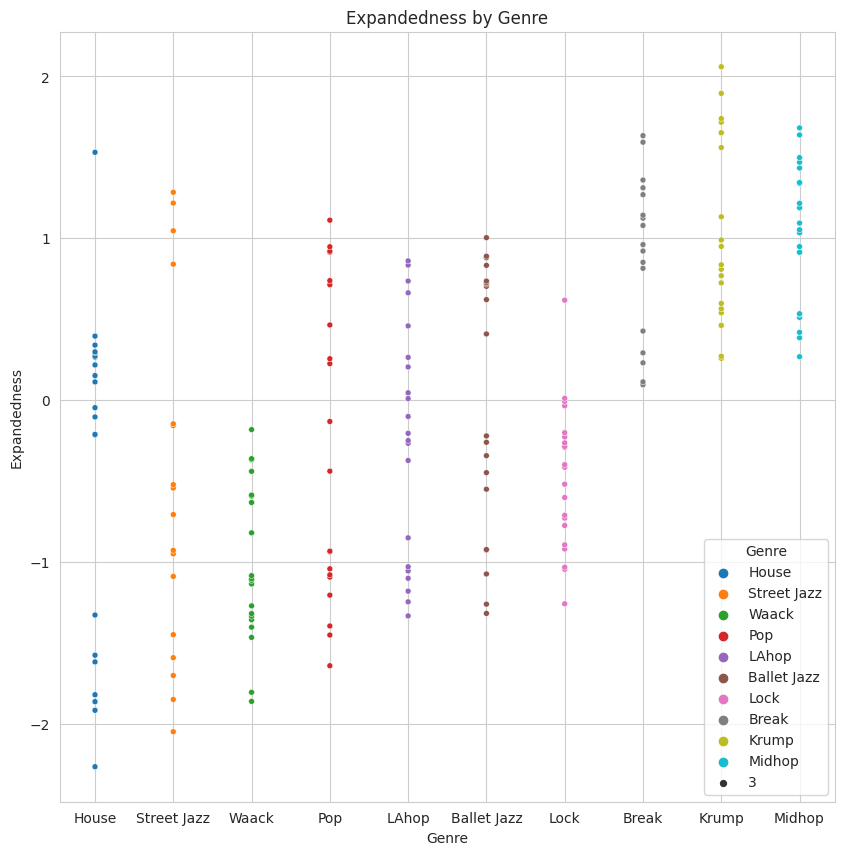

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
#scatter plot of Expandedness on y axis, dance genre on X axis, ordered by expandedness
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.scatterplot(data=dfFM_scaled[['Expandedness', 'Genre']].sort_values(by='Expandedness'), x='Genre', y='Expandedness', hue='Genre', size=3)
plt.title('Expandedness by Genre')
plt.show()
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
#plt.savefig('../plots/Expandednessscatter.png')

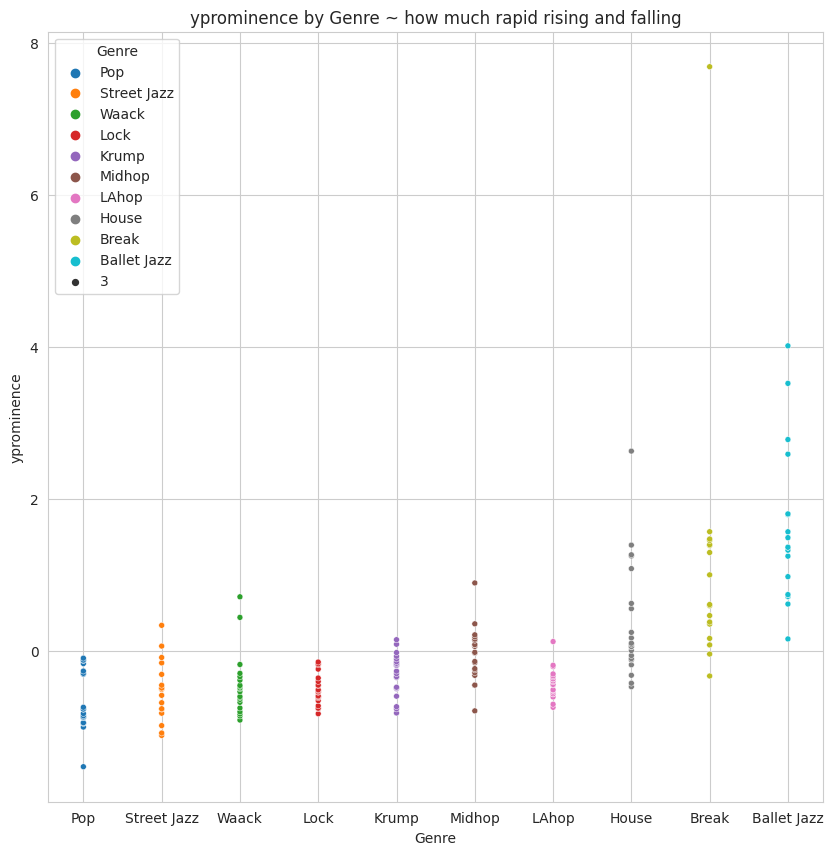

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
#scatter plot of yprominence on y axis, dance genre on X axis, ordered by yprominence
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.scatterplot(data=dfFM_scaled[['yprominence', 'Genre']].sort_values(by='yprominence'), x='Genre', y='yprominence', hue='Genre', size=3)
plt.title('yprominence by Genre ~ how much rapid rising and falling')
plt.savefig('../plots/yprominencescatter.png')
plt.show()


In [ ]:
# #drop id column and genre column
# dfFM.drop(['id', 'Genre'], axis=1, inplace=True)
# dfBM.drop(['id', 'Genre'], axis=1, inplace=True) 

/tmp/ipykernel_4044/1142114441.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(dfBM_scaled.corr(), interpolation='nearest', fignum=1)


<function matplotlib.pyplot.show(close=None, block=None)>

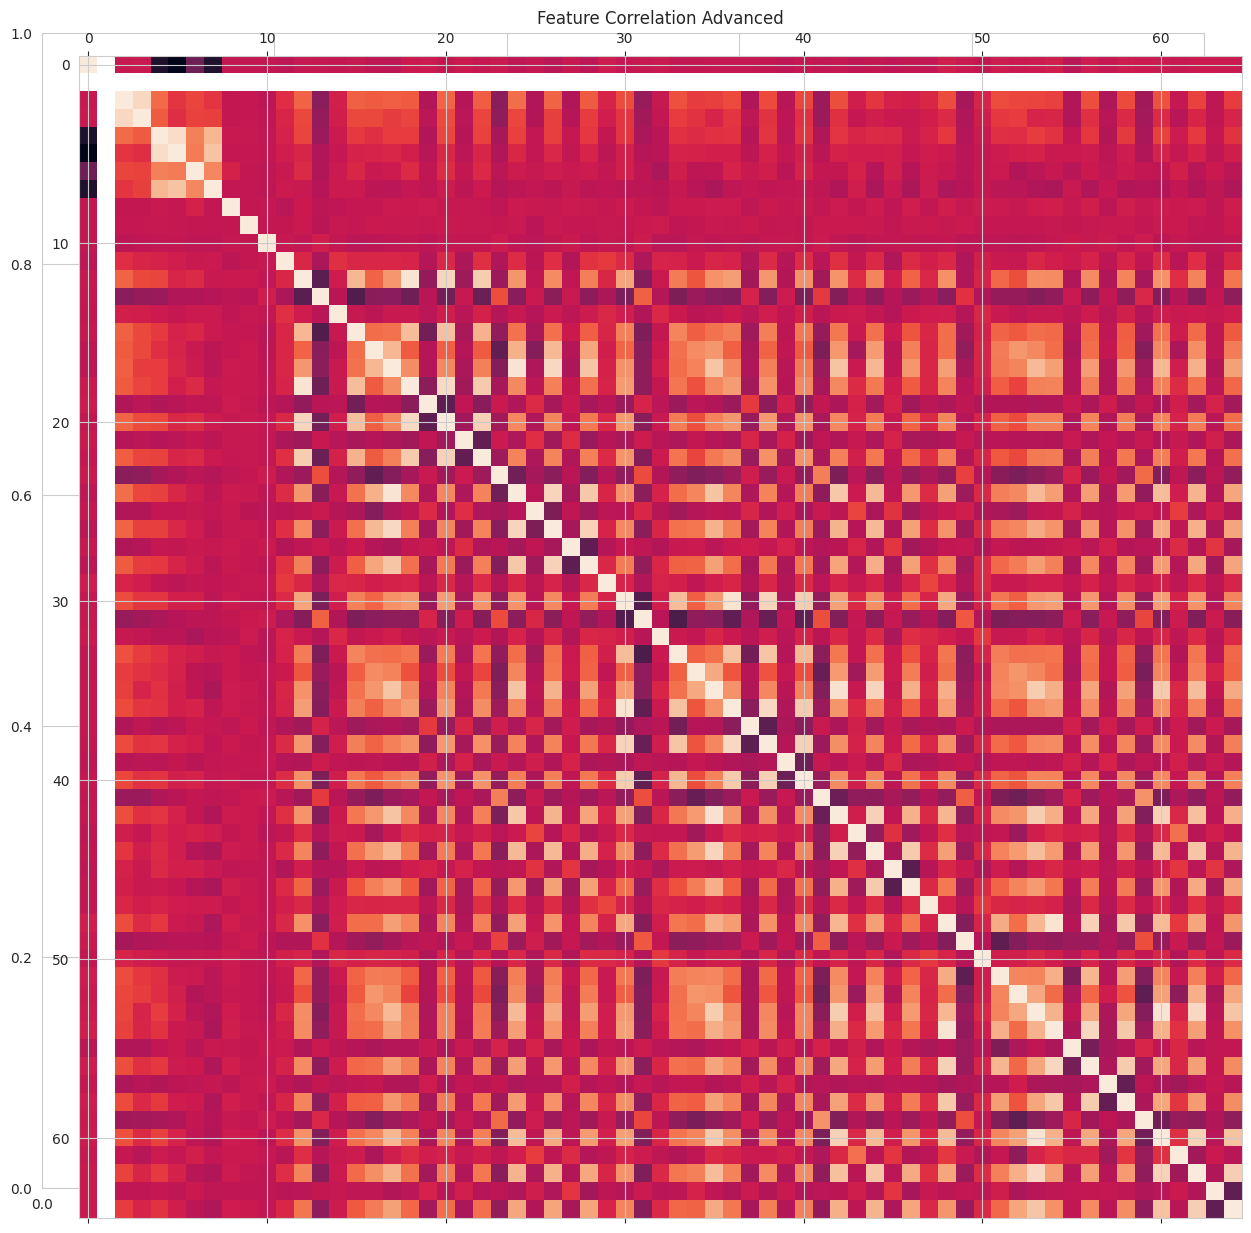

In [36]:
fig = plt.subplots(figsize=(15, 15))
plt.matshow(dfBM_scaled.corr(), interpolation='nearest', fignum=1)
plt.title('Feature Correlation Advanced')
plt.savefig('AdvFeatCorr_65.png')
plt.show

In [ ]:
#plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(dfFM_scaled.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

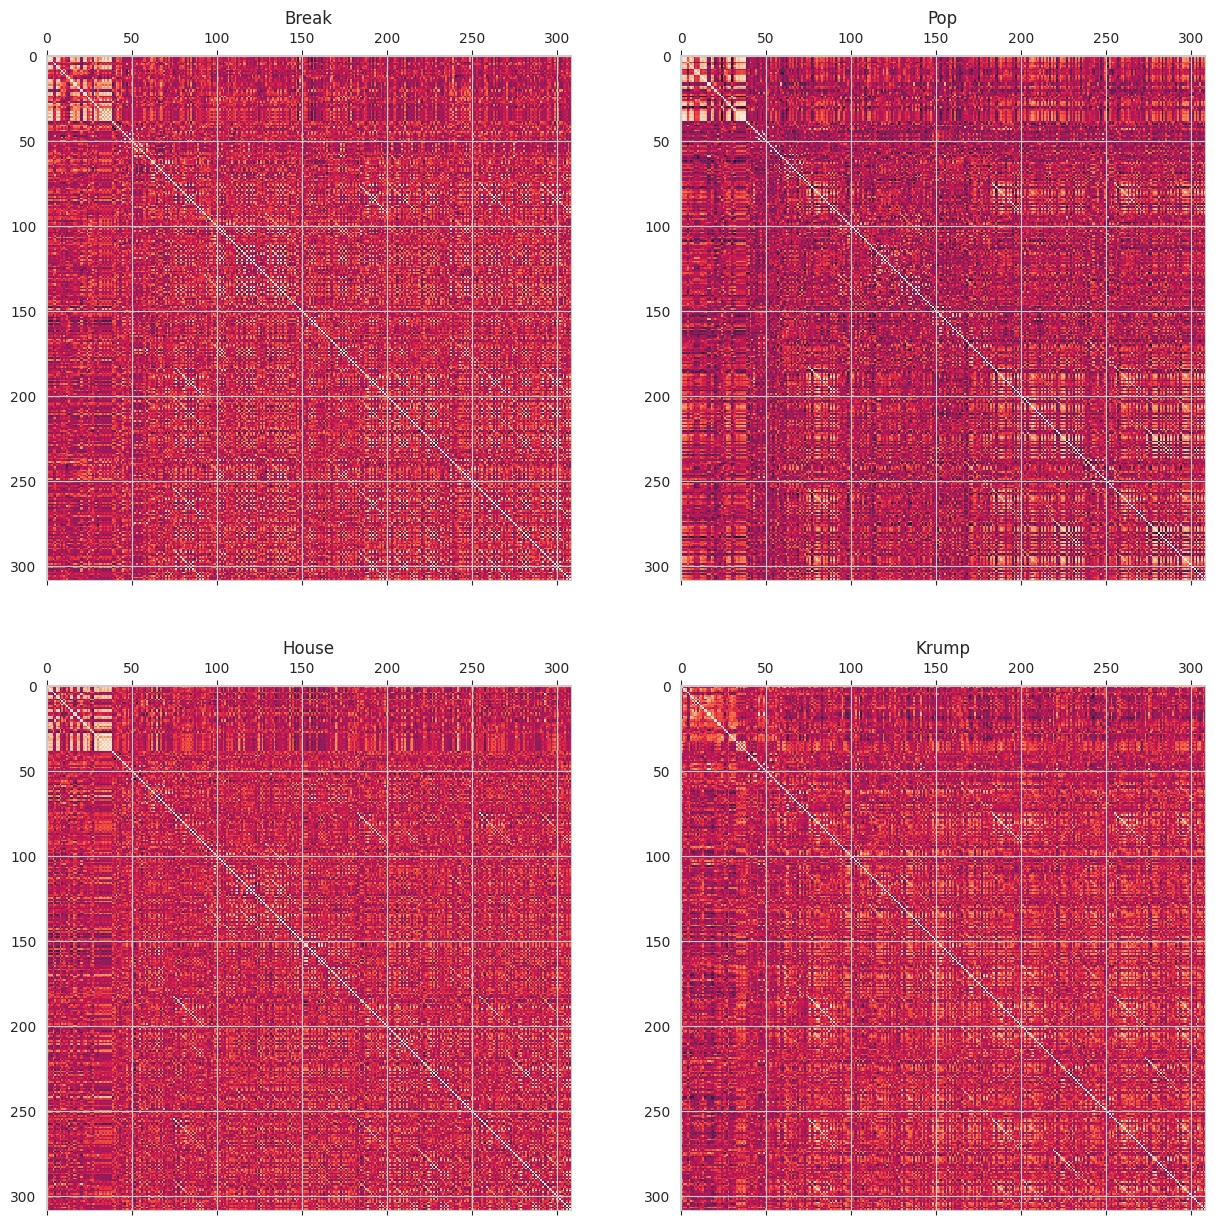

In [14]:
# two by two subplots of the correlation matrices for Break, Pop, House, Krump
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].matshow(dfABreak.corr())
axs[0, 0].set_title('Break')
axs[0, 1].matshow(dfAPop.corr())
axs[0, 1].set_title('Pop')
axs[1, 0].matshow(dfAHouse.corr())
axs[1, 0].set_title('House')
axs[1, 1].matshow(dfAKrump.corr())
axs[1, 1].set_title('Krump')
#plt.savefig('AdvFeatCorr_BreakPopHouseKrump.png')
#plt.savefig('AdvFeatCorr_BreakPopHouseKrump_sparse.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

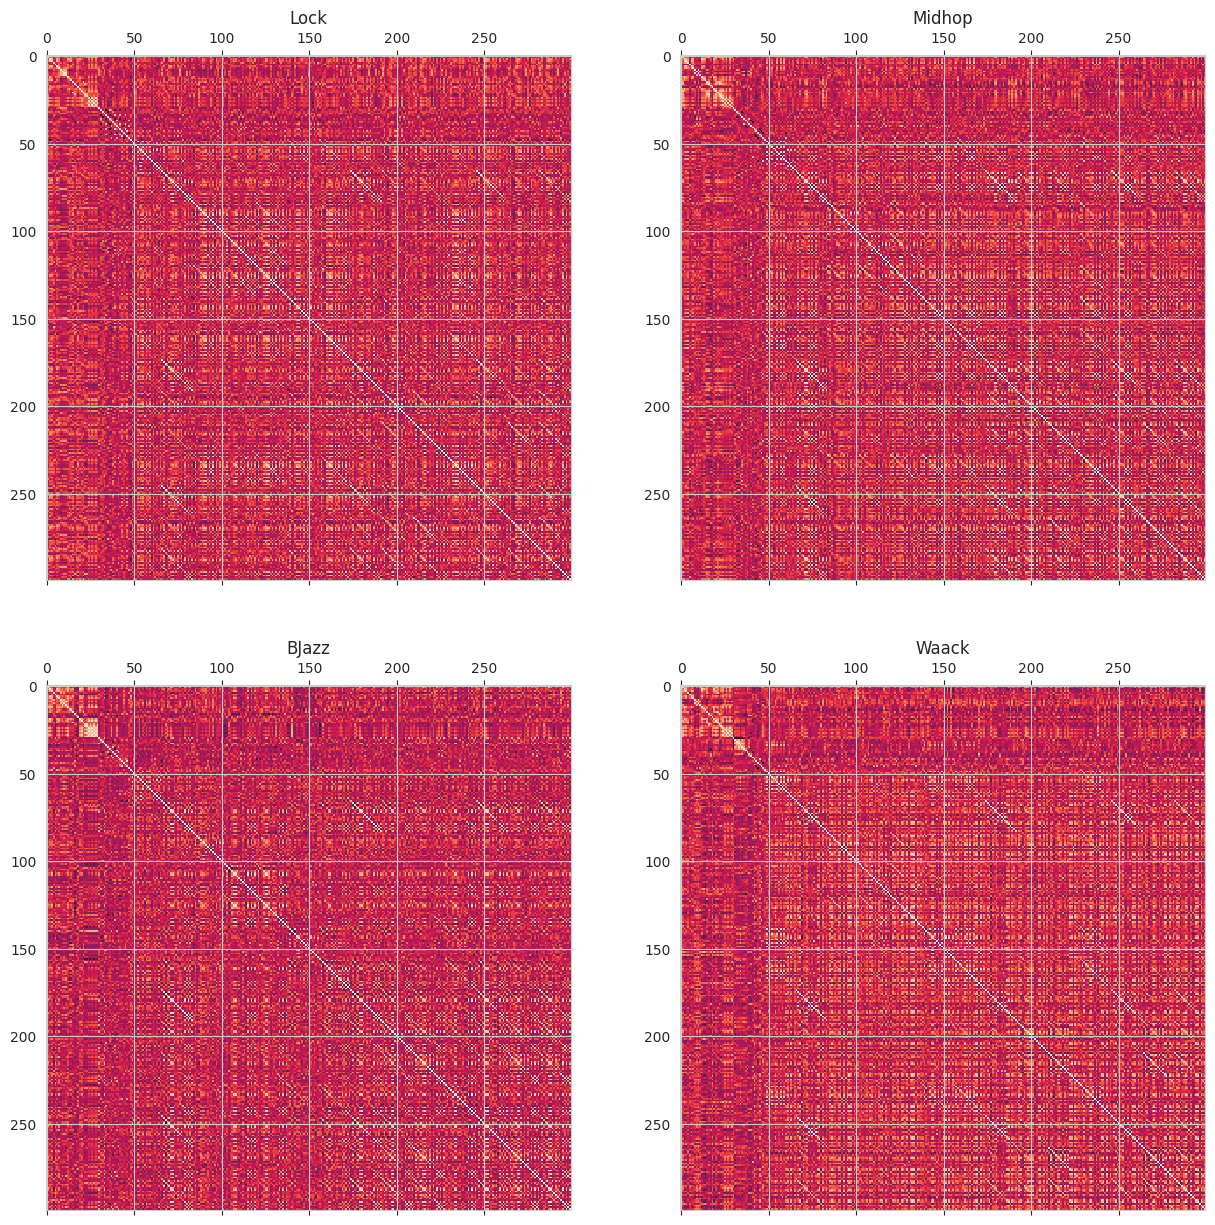

In [21]:
# two by two subplots of the correlation matrices for Lock, Midhop, BJazz, Waack, Basic
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].matshow(dfALock.corr())
axs[0, 0].set_title('Lock')
axs[0, 1].matshow(dfAMidhop.corr())
axs[0, 1].set_title('Midhop')
axs[1, 0].matshow(dfABJazz.corr())
axs[1, 0].set_title('BJazz')
axs[1, 1].matshow(dfAWaack.corr())
axs[1, 1].set_title('Waack')
plt.savefig('SparseCorr_LockMidhopBJazzWaack.png')
plt.show

In [ ]:
# two by two subplots of the correlation matrices for LAhop, SJazz, House, Krump
fig, axs = plt.subplots(1, 2, figsize=(10, 20))
axs[0].matshow(dfALAhop.corr())
axs[0].set_title('LAhop')
axs[1].matshow(dfASJazz.corr())
axs[1].set_title('SJazz')
plt.savefig('SpraseCorr_LAhopSJazz.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

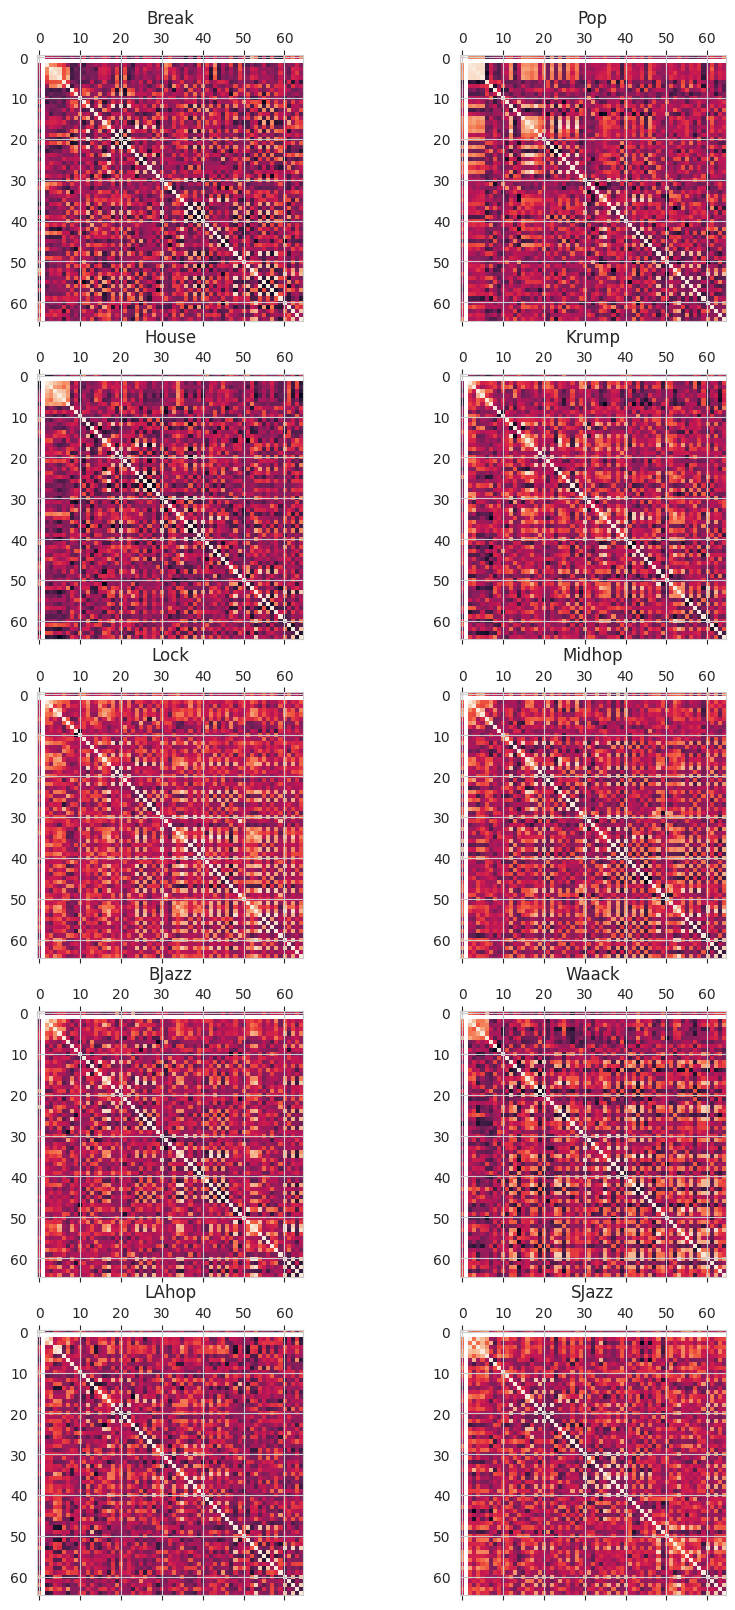

In [37]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

axs[0, 0].matshow(dfABreak.corr())
axs[0, 0].set_title('Break')
axs[0, 1].matshow(dfAPop.corr())
axs[0, 1].set_title('Pop')
axs[1, 0].matshow(dfAHouse.corr())
axs[1, 0].set_title('House')
axs[1, 1].matshow(dfAKrump.corr())
axs[1, 1].set_title('Krump')
axs[2, 0].matshow(dfALock.corr())
axs[2, 0].set_title('Lock')
axs[2, 1].matshow(dfAMidhop.corr())
axs[2, 1].set_title('Midhop')
axs[3, 0].matshow(dfABJazz.corr())
axs[3, 0].set_title('BJazz')
axs[3, 1].matshow(dfAWaack.corr())
axs[3, 1].set_title('Waack')
axs[4, 0].matshow(dfALAhop.corr())
axs[4, 0].set_title('LAhop')
axs[4, 1].matshow(dfASJazz.corr())
axs[4, 1].set_title('SJazz')
#plt.savefig('featurecorr_genres_sparse.png')
plt.show

In [38]:
#make df of features by genre
features = dfFM.columns.drop('id').drop('Genre')
features

Index(['angularmomentum', 'angularmomentumstd', 'wristacceleration',
       'wristaccstd', 'ankleacceleration', 'ankleaccstd', 'Expandedness',
       'Expandedness_std', 'Asym_RL_acc', 'Asym_IO_acc', 'Asym_TB_acc',
       'lastpeak_ywrists', 'prominence1_ywrists', 'peak1_ywrists',
       'lastpeak_xzwrists', 'onehit_ywrists', 'onehit_xzwrists',
       'promstd_xzwrists', 'promstd_ywrists', 'peak2_ywrists',
       'prominence2_ywrists', 'peak3_ywrists', 'prominence3_ywrists',
       'peak1_xzwrists', 'prominence1_xzwrists', 'peak2_xzwrists',
       'prominence2_xzwrists', 'peak3_xzwrists', 'prominence3_xzwrists',
       'lastpeak_ycontralatRsLk', 'prominence1_ycontralatRsLk',
       'peak1_ycontralatRsLk', 'lastpeak_xzcontralatRsLk',
       'onehit_ycontralatRsLk', 'onehit_xzcontralatRsLk',
       'promstd_xzcontralatRsLk', 'promstd_ycontralatRsLk',
       'peak2_ycontralatRsLk', 'prominence2_ycontralatRsLk',
       'peak3_ycontralatRsLk', 'prominence3_ycontralatRsLk',
       'peak1_xzc

In [39]:
#make df of features by genre
features = dfFM.columns.drop('Genre').drop('id')


featuresdf = pd.DataFrame(columns=dfFM['Genre'].unique(), index=features)
#remove genre row

for i, feature in enumerate(features):
    for genre in dfFM['Genre'].unique():
        featuresdf.iloc[i][genre] = dfFM[feature][dfFM['Genre']==genre].mean()

# z scale columns of featuresdf
featuresdf_norm = featuresdf.to_numpy()
for i in range(len(featuresdf_norm)):
    featuresdf_norm[i] = (featuresdf_norm[i] - featuresdf_norm[i].mean())/featuresdf_norm[i].std()

featuresdf_norm = pd.DataFrame(featuresdf_norm, columns=featuresdf.columns, index=featuresdf.index)
featuresdf_norm.head()

/tmp/ipykernel_4044/4127840149.py:15: RuntimeWarning: invalid value encountered in double_scalars
  featuresdf_norm[i] = (featuresdf_norm[i] - featuresdf_norm[i].mean())/featuresdf_norm[i].std()
/tmp/ipykernel_4044/4127840149.py:15: RuntimeWarning: invalid value encountered in divide
  featuresdf_norm[i] = (featuresdf_norm[i] - featuresdf_norm[i].mean())/featuresdf_norm[i].std()


Break       Pop      Lock    Midhop     LAhop  \
angularmomentum     0.410019 -0.060156 -1.033887  1.877834 -0.870557   
angularmomentumstd       NaN       NaN       NaN       NaN       NaN   
wristacceleration   1.067036 -2.088936 -0.410257  0.806022 -0.266538   
wristaccstd         0.732493 -2.031023 -0.253707  0.272979 -0.683067   
ankleacceleration   1.592322 -1.305165 -0.371371  0.878738 -0.339117   

                       House     Waack     Krump Street Jazz Ballet Jazz  
angularmomentum     1.657839 -0.343696 -1.027009   -0.733928    0.123542  
angularmomentumstd       NaN       NaN       NaN         NaN         NaN  
wristacceleration   0.865092 -0.457329  0.285974   -1.029614     1.22855  
wristaccstd          -0.2166 -0.522607  0.776503   -0.026698    1.951725  
ankleacceleration   1.425748 -0.828722 -0.469574    -1.19311     0.61025

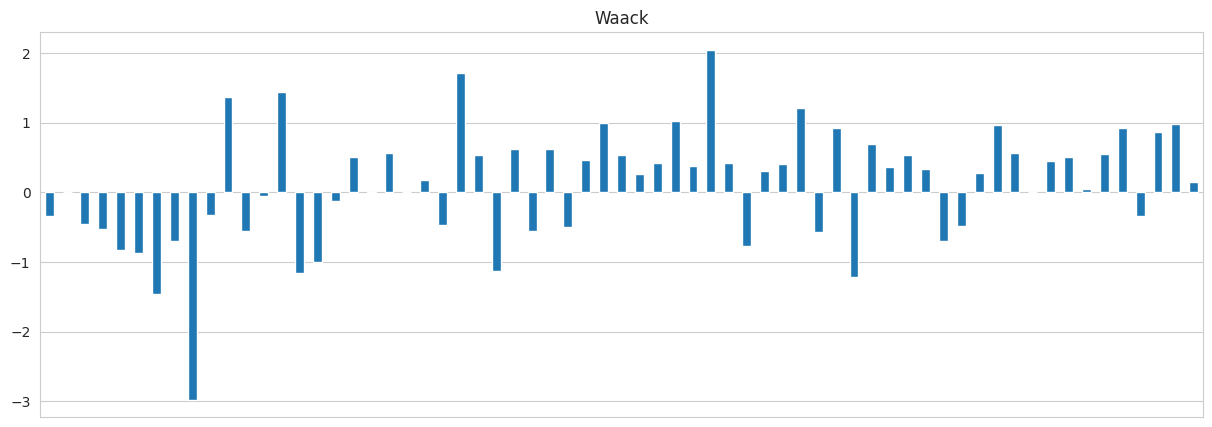

In [40]:
#bar plot of Waack, normalized features values 
featuresdf_norm['Waack'].plot(kind='bar', figsize=(15, 5))
plt.title('Waack')
plt.xticks([])
#plt.savefig('WaackFeatures.png')
plt.show()




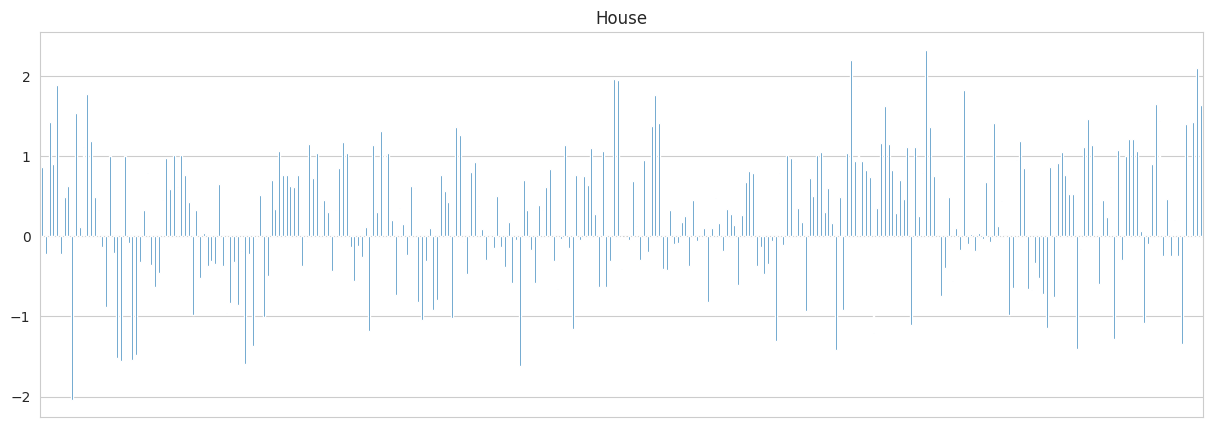

In [22]:
#bar plot of House, normalized features values 
featuresdf_norm['House'].plot(kind='bar', figsize=(15, 5))
plt.title('House')
plt.xticks([])
#plt.savefig('HouseFeatures.png')
plt.show()

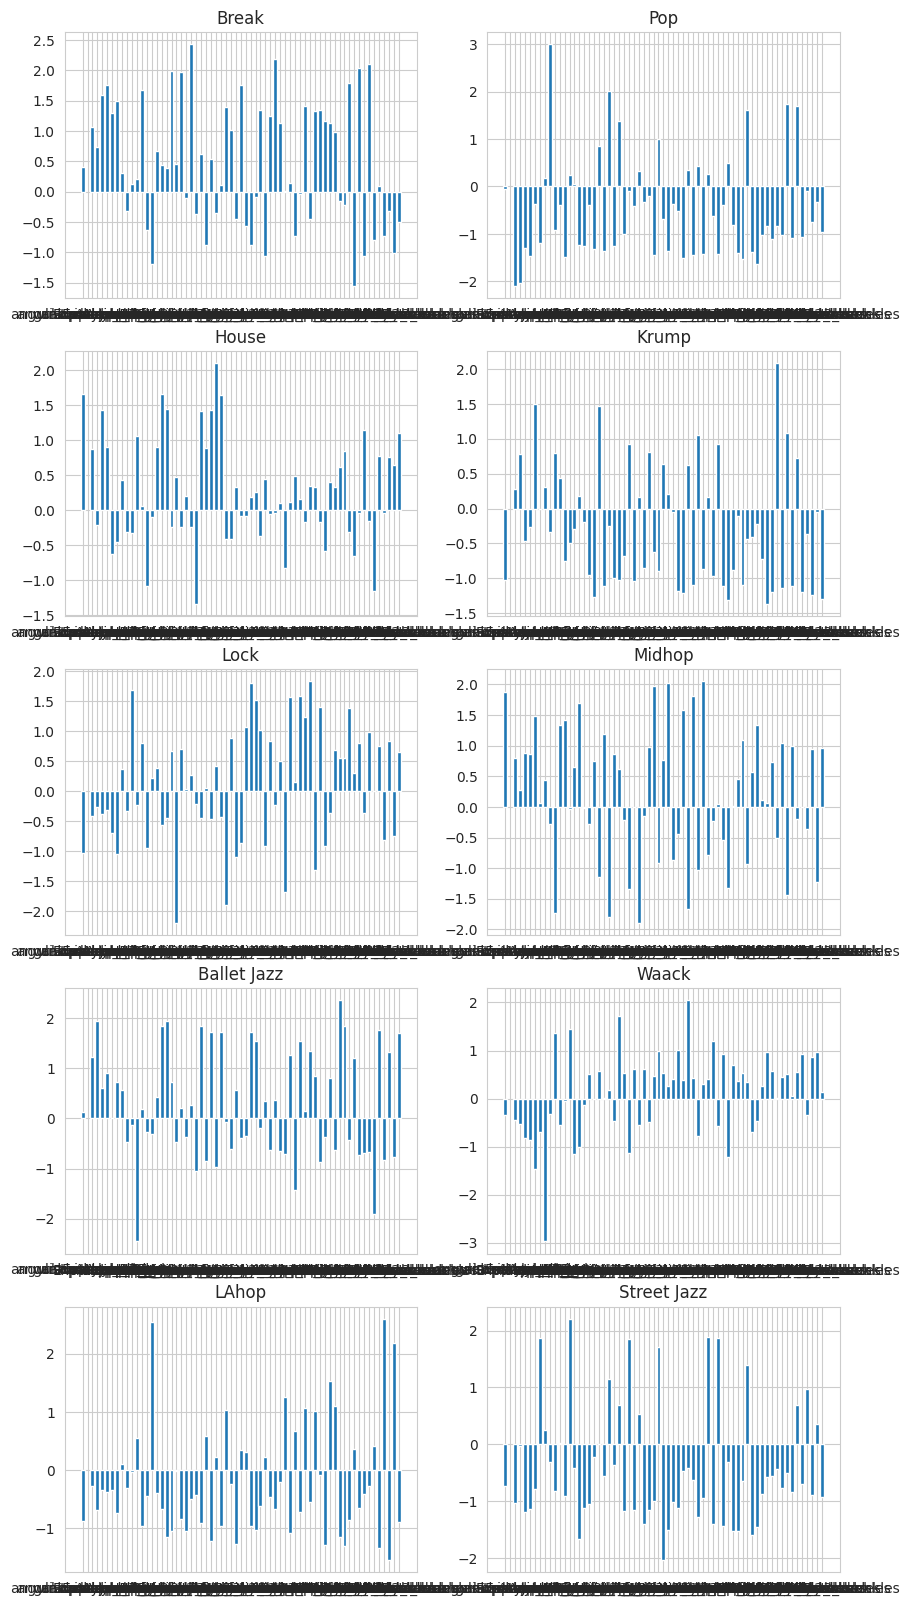

In [42]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

axs[0, 0].bar(featuresdf_norm.index, featuresdf_norm['Break'])
axs[0, 0].set_title('Break')
axs[0, 1].bar(featuresdf_norm.index, featuresdf_norm['Pop'])
axs[0, 1].set_title('Pop')
axs[1, 0].bar(featuresdf_norm.index, featuresdf_norm['House'])
axs[1, 0].set_title('House')
axs[1, 1].bar(featuresdf_norm.index, featuresdf_norm['Krump'])
axs[1, 1].set_title('Krump')
axs[2, 0].bar(featuresdf_norm.index, featuresdf_norm['Lock'])
axs[2, 0].set_title('Lock')
axs[2, 1].bar(featuresdf_norm.index, featuresdf_norm['Midhop'])
axs[2, 1].set_title('Midhop')
axs[3, 0].bar(featuresdf_norm.index, featuresdf_norm['Ballet Jazz'])
axs[3, 0].set_title('Ballet Jazz')
axs[3, 1].bar(featuresdf_norm.index, featuresdf_norm['Waack'])
axs[3, 1].set_title('Waack')
axs[4, 0].bar(featuresdf_norm.index, featuresdf_norm['LAhop'])
axs[4, 0].set_title('LAhop')
axs[4, 1].bar(featuresdf_norm.index, featuresdf_norm['Street Jazz'])
axs[4, 1].set_title('Street Jazz')
plt.savefig('featurebar_genres_sparse.png')
plt.show()

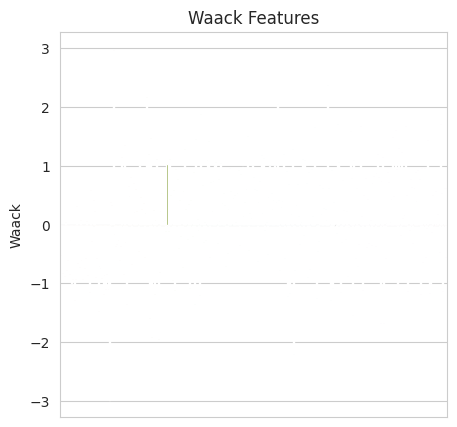

In [19]:
#bar plot of Waack, normalized features values 
#sns.set_style('whitegrid')
plt.figure(figsize=(5,5))
sns.barplot(data=featuresdf_norm, x=featuresdf_norm.index, y='Waack')
#make xticks go away
plt.xticks([])
plt.title('Waack Features')
plt.savefig('../plots/feature_plots/Waackfeatures.png')
plt.show()